In [1]:
#Importing much needed libraries for future analysis of the data 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns
%matplotlib notebook

# 1 Acquiring and Loading the data from its source 

In [28]:
##using pandas library to read the complete data file
data = pd.read_csv('/Users/mac/Desktop/The Empire rights back/PROJECTS/AirbnB Data/AB_NYC_2019.csv', header='infer')
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# 2. Understanding, wrangling and cleaning the data

In [29]:
#After looking at 10 first columns we noticed Nans hence, need to analyse missing values
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the nature of our dataset, columns "name" and "host_name" are irrelevant and insignificant to our data analysis.
Columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. 
For "review_per_month" column we can simply append the missing values with 0 

In [30]:
#Checking the length of the rows and columns 
data.shape 

(48895, 16)

In [31]:
##Checking type of every column in the data
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [32]:
#dropping columns that are not significant for exploratory analysis
data.drop(['host_name','last_review'], axis=1, inplace=True)

Worthy of note, we are dropping the 'host_name' column for ethical reasons, it won't not only add any value to our analysis, but is of no interest in this context.

In [33]:
#crosscheck
data.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Here we'll replace all NAs in 'reviews_per_month' with 0 

In [34]:
data.fillna({'reviews_per_month':0}, inplace=True)

In [35]:
data.reviews_per_month.isna().sum()

0

We proceed with examing some interesting categorical unique values. This will prove relevant subsequently

In [36]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [37]:
data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [38]:
#Looking into room types
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Exploring and Visualising Data

Let's see which hosts have the most number of visits on AirbnB NYC

In [39]:
top_host = data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [40]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

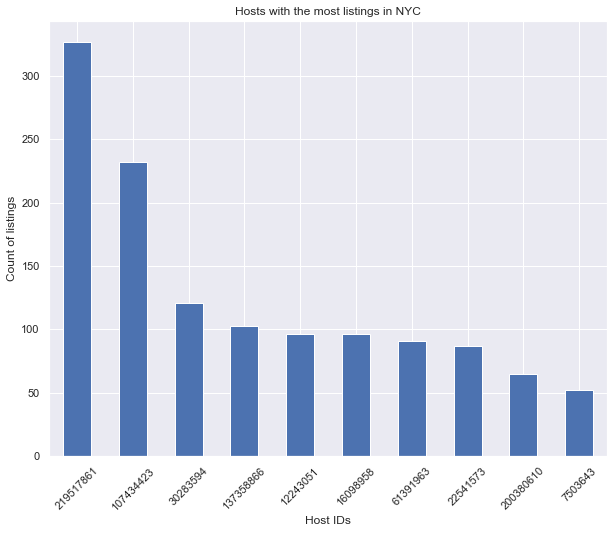

In [41]:
tophost=top_host.plot(kind='bar')
tophost.set_title('Hosts with the most listings in NYC')
tophost.set_ylabel('Count of listings')
tophost.set_xlabel('Host IDs')
tophost.set_xticklabels(tophost.get_xticklabels(),rotation=45)

Apparently the first host has over 300 listings to their name, the others follow suit with similar distributions

Now i want to create a violin plot to see density distribution of the relationship between price and the neighbourhood groups. 
First we need to look at the price distribution 

In [42]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

We notice the mean price lurks around 152 but there are prices that go up to 10,000, hence we will look at the distribution with everything below 500 to have a proper idea of the price distribution. 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

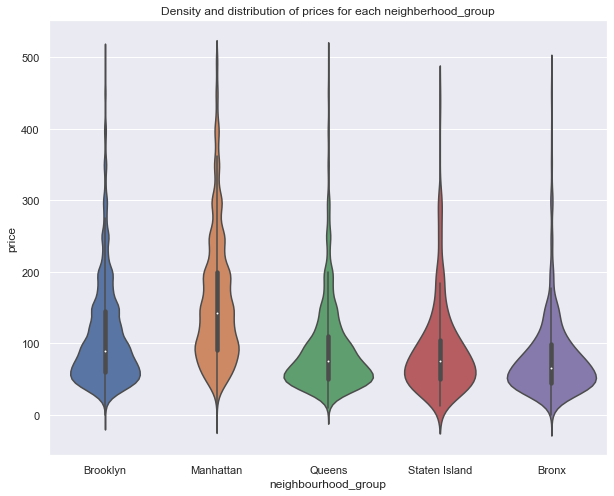

In [43]:
#using violinplot to showcase density and distribtuion of prices 
under500 = data[data.price<500]
n_g_price=sns.violinplot(data=under500, x='neighbourhood_group', y='price')
n_g_price.set_title('Density and distribution of prices for each neighberhood_group')

In [44]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<b>Point of Interest:</b> <br>Queens with over 5000 listings has same average price per night with Staten Island with just 300+ listings. It follows that either Staten Island isn't doing something right, or they just started running the service in that part. 

In [45]:
#Neighbourhoods with top 10listings 
data.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

We'll add another other attributes at this point to see the most used room types.<br> And see what neighbourhood groups the top 10 belong to 

In [46]:
#grabbing top 10 neighbourhoods for sub-dataframe
top10=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

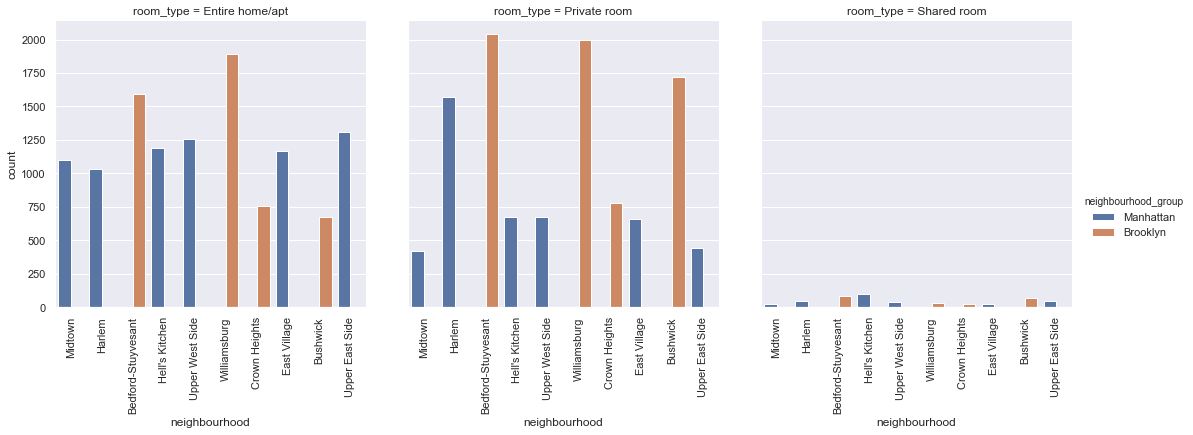

In [47]:
#The catplot can represent multiple attributes
topten=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top10, kind='count')
topten.set_xticklabels(rotation=90)

<b>Intuition from these plots</b> <br> 
Only neighbourhood groups Brooklyn and Manhattan feature in Top 10. <br>
Bedford-Stuyvesant and Williambsburg have consistently high listings across Entire home and Private rooms listings <br>
Shared Room have relatively low listings <br>
Private Room in Bedford-Stuyvesant has the highest amount of listings above 2000

In [48]:
#Let's see the 10 most reviewed in NYC 
top_reviewed=data.nlargest(10,'number_of_reviews')
top_reviewed

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [49]:
#Average price per night in top 10 most reviewed areas
price_avrg=top_reviewed.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


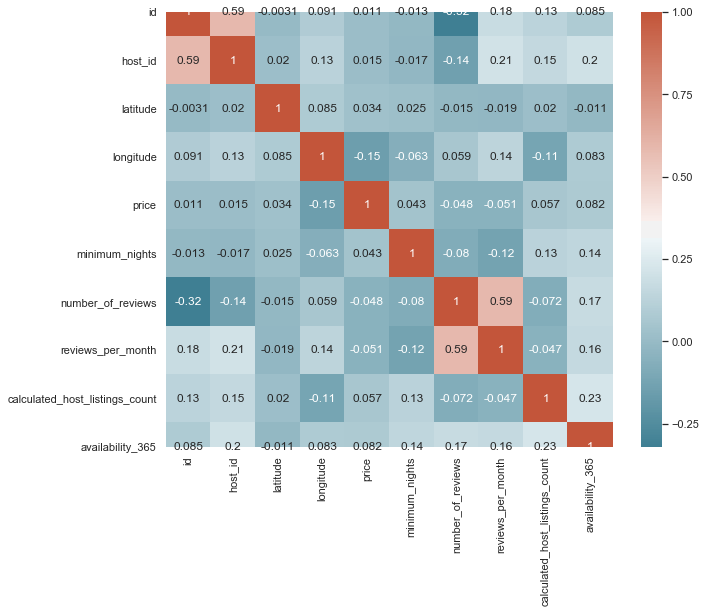

In [50]:
#Plotting a heatmap to view correlation matrix of the features 
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=sns.diverging_palette(220,20,as_cmap=True))

The strongest correlation we can find here is that between number of reviews and reviews per month <br>
We couldn't get much intution from this, however we move to remove features no longer necessary for the process.

In [51]:
data.drop(['name','host_id','neighbourhood_group','neighbourhood'], axis=1, inplace=True)

In [52]:
data.head(2)

,id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [53]:
data.id.nunique()

48895

Now we are going to dummify the Room_type column since we can't pass categorical variables into the model

In [61]:
dummy = pd.get_dummies(data['room_type'])

In [62]:
data=pd.concat([data,dummy], axis=1)

In [63]:
data.head(2)

,id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2539,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,1,0
1,2595,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,0,0


In [64]:
data.drop('room_type',inplace=True,axis=True)

In [65]:
data.head(2)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2539,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0
1,2595,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0


In [66]:
#Checking data types before we scale the data 
data.dtypes

id                                  int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Entire home/apt                     uint8
Private room                        uint8
Shared room                         uint8
dtype: object

## Scaling the Data

Now we standardize the data to make sure measure or size does not affect the model 

In [67]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
std_data = standardizer.fit_transform(data)
stdata = pd.DataFrame(std_data, columns= data.columns)

In [68]:
#Checking if the data has been standardized
stdata.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
count,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04
mean,-1.362086e-15,3.949141e-14,1.662286e-13,-5.581769e-16,-7.665145e-16,-2.315687e-14,4.282961e-15,3.545441e-14,1.387977e-14,1.712342e-14,8.188716e-15,-3.403546e-14
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.731277e+00,-4.202474e+00,-6.331760e+00,-6.359342e-01,-2.939962e-01,-5.224332e-01,-6.829856e-01,-1.864514e-01,-8.568646e-01,-1.040134e+00,-9.166802e-01,-1.558872e-01
25%,-8.690887e-01,-7.124376e-01,-6.694733e-01,-3.486158e-01,-2.939962e-01,-4.999866e-01,-6.579428e-01,-1.864514e-01,-8.568646e-01,-1.040134e+00,-9.166802e-01,-1.558872e-01
50%,6.010571e-02,-1.078110e-01,-7.605436e-02,-1.945465e-01,-1.964844e-01,-4.102001e-01,-4.513398e-01,-1.864514e-01,-5.149737e-01,9.614147e-01,-9.166802e-01,-1.558872e-01
75%,9.227933e-01,6.265619e-01,3.443653e-01,9.277183e-02,-9.897262e-02,1.628580e-02,3.062045e-01,-1.561044e-01,8.677849e-01,9.614147e-01,1.090893e+00,-1.558872e-01
max,1.590650e+00,3.376357e+00,5.181954e+00,4.100441e+01,6.060212e+01,1.359649e+01,3.594209e+01,9.706672e+00,1.916250e+00,9.614147e-01,1.090893e+00,6.414894e+00


# 3 Model Building process

In [69]:
from sklearn.cluster import KMeans 

## Elbow method 

In [70]:

wss = {}
for k in range(1,12):
    kmeans_loop=KMeans(n_clusters=k, max_iter=300, n_init=20, random_state=1234,verbose=0).fit(stdata)
    clusters= kmeans_loop.labels_
    wss[k]= kmeans_loop.inertia_ 

In [71]:
list(wss.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [72]:
wss.values()

dict_values([586740.0000000041, 485799.01642317016, 433438.96153705526, 390494.2346299149, 349321.0147652902, 323792.0142293299, 303364.9471461389, 284386.080129171, 260432.92667789562, 246483.29621684705, 232724.4137580761])

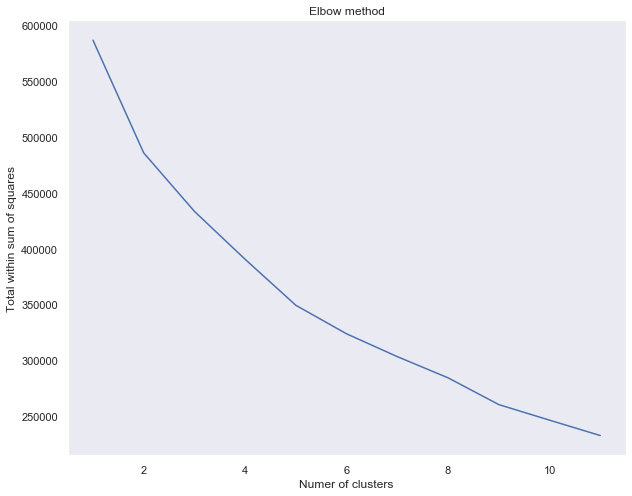

In [74]:
plt.figure()
plt.plot(list(wss.keys()),list(wss.values()))
plt.grid()
plt.title('Elbow method')
plt.xlabel('Numer of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

<b>Difficult descerning the elbow point, so we'll make use of the silhouette method to decide number of clusters</b>

In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


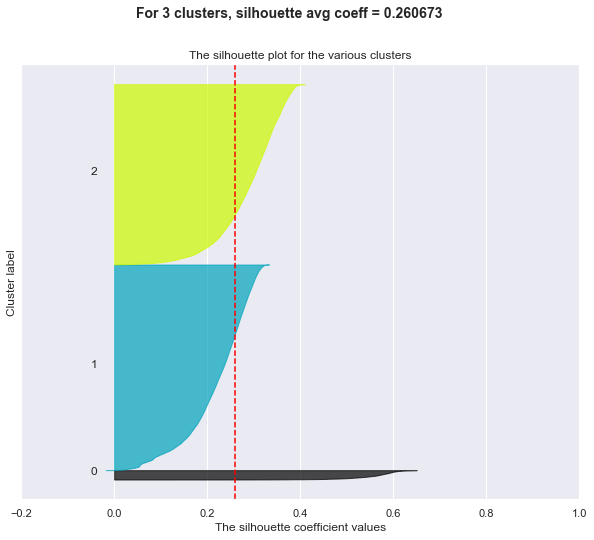

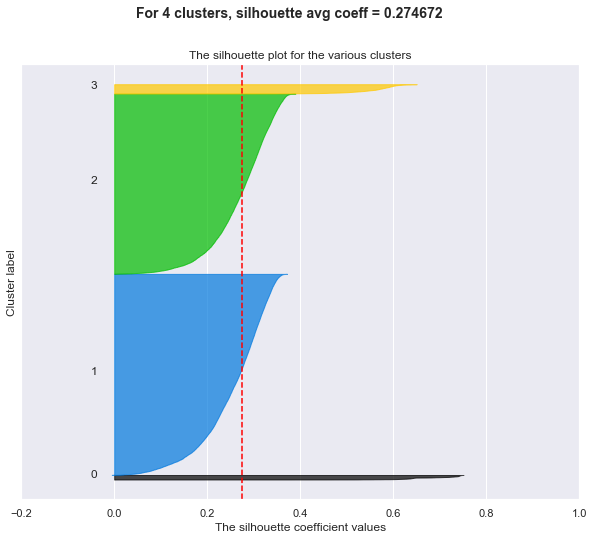

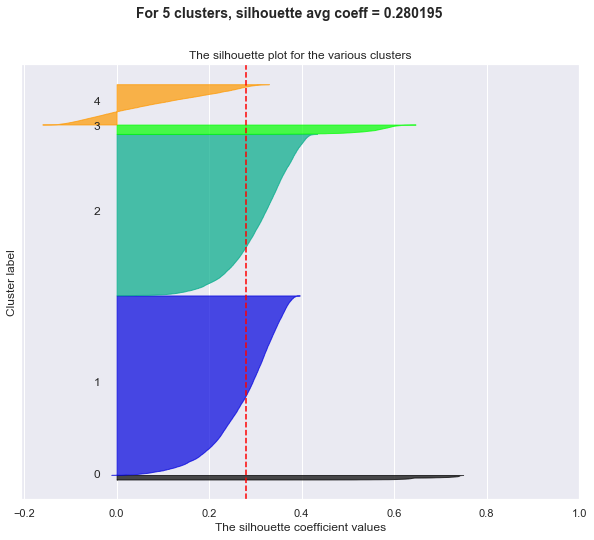

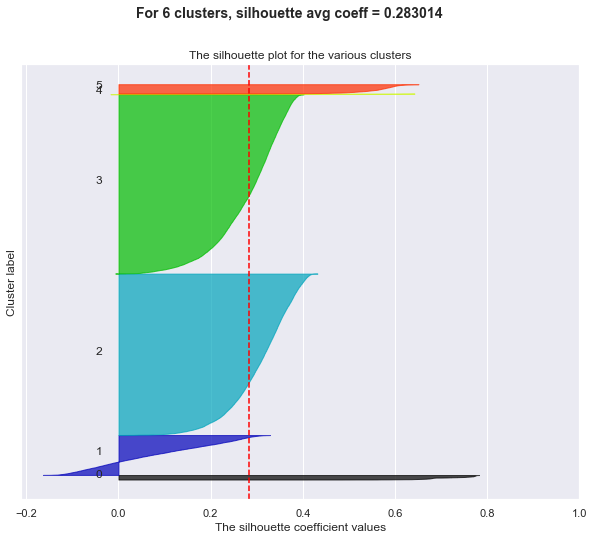

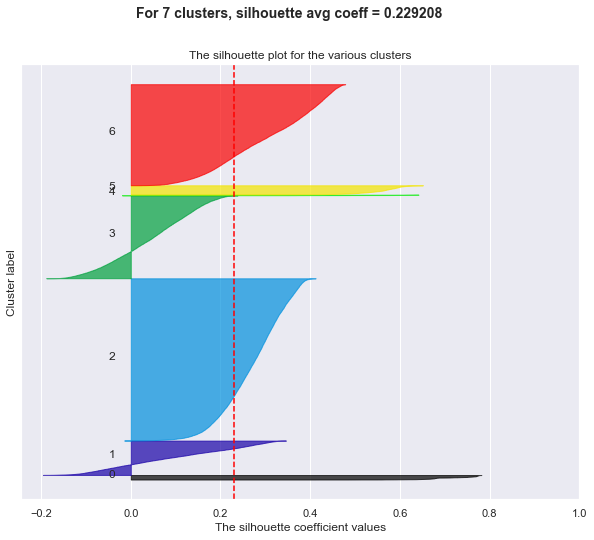

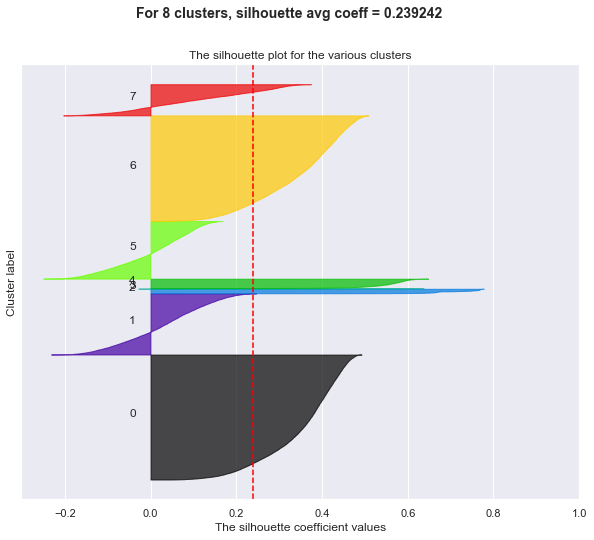

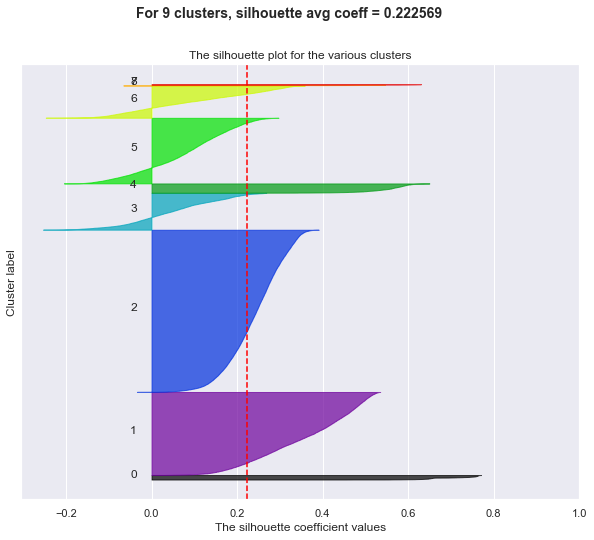

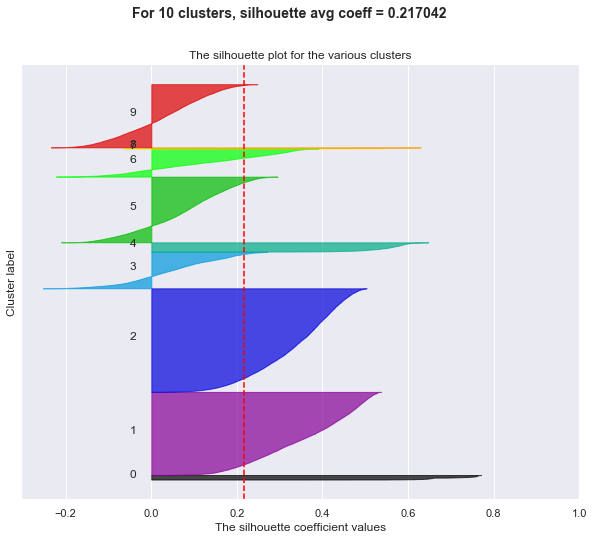

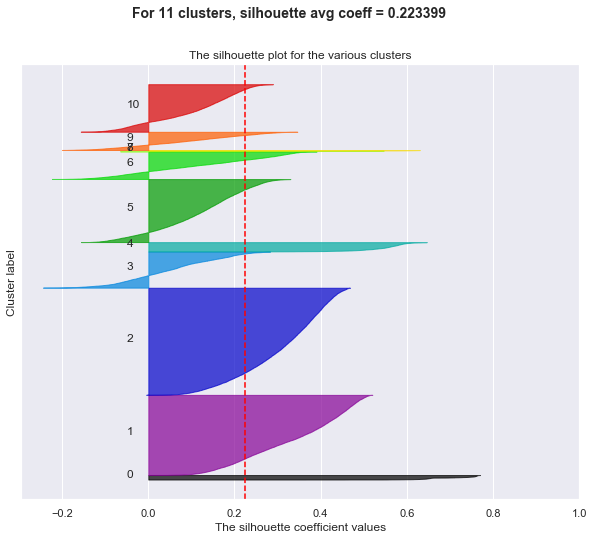

In [76]:
X_matrix = stdata.as_matrix()

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

In [77]:
ID = data['id']

In [78]:
bestk = KMeans(n_clusters=4, random_state=1234)
bestclusters = bestk.fit_predict(stdata)

In [80]:
results = pd.DataFrame({'id':ID, 'Clusters':bestclusters})
results.head(5)

,id,Clusters
0,2539,1
1,2595,2
2,3647,1
3,3831,2
4,5022,2


In [82]:
info = pd.read_csv('/Users/mac/Desktop/The Empire rights back/PROJECTS/AirbnB Data/AB_NYC_2019.csv', header='infer')
res = pd.merge(info,results, on='id')
res.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Clusters
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2


In [103]:
##Saving the clusters to a csv file 
res.to_csv('Clusters NY AIRBnB.csv', index=None)

In [102]:
#saving mall centroids in case of deployment 
abcentroids =pd.DataFrame(standardizer.inverse_transform(bestk.cluster_centers_),columns=stdata.columns) 
abcentroids

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,3.220686e+07,40.729760,-73.996848,273.328597,28.545293,2.376554,0.719041,285.545293,281.509769,9.840142e-01,1.598579e-02,1.387779e-16
1,1.946318e+07,40.729220,-73.942871,86.175600,5.267908,24.139987,1.144037,3.112716,111.044135,-2.198242e-14,1.000000e+00,-1.533496e-15
2,1.813300e+07,40.728615,-73.959903,213.480765,8.148089,23.282952,1.052532,4.571934,108.224585,9.991156e-01,8.843510e-04,-1.800643e-15
3,2.300378e+07,40.730514,-73.943343,70.127586,6.475000,16.600000,1.073345,4.662931,162.000862,-1.221245e-15,-7.771561e-16,1.000000e+00


In [85]:
res.Clusters.value_counts()

2    24877
1    22295
3     1160
0      563
Name: Clusters, dtype: int64